# Introduction to TensorFlow and Keras

# Problems:

### Problem 1: 

Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

In [1]:
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('legend', fontsize=18)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [55]:
import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[:5000].reshape(-1, 28*28)
y_train = y_train[:5000]#.reshape(-1, 1)
X_test = X_test[:1000].reshape(-1, 28*28)
y_test = y_test[:1000]#.reshape(-1, 1)


y_traind = pd.get_dummies(y_train)
y_testd = pd.get_dummies(y_test)


#scale pixels down to be between 0 and 1

X_train, X_test = X_train/255., X_test/255.

print("X_train shape:", X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5000, 784)
y_train shape: (5000,)
X_test shape: (1000, 784)
y_test shape: (1000,)


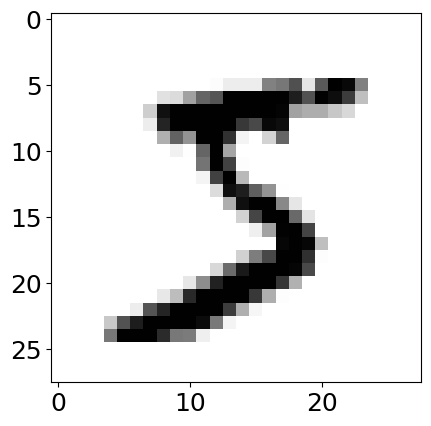

In [16]:
plt.imshow(X_train[0], cmap="binary")

In [17]:
X_train.dtype

dtype('uint8')

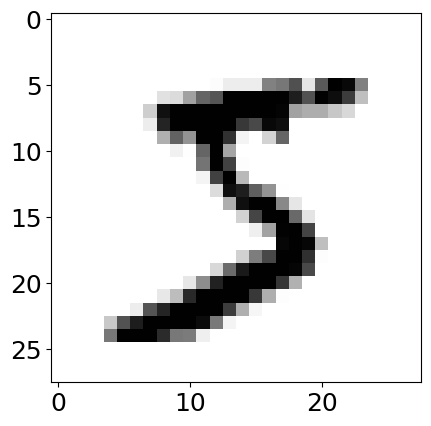

In [20]:
plt.imshow(X_train[0], cmap="binary")

In [85]:
#relu in the hidden layer. peak accuracy: 0.9358

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #softmax works best when the target is a multicategorical

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 300)               235500    
                                                                 
 dense_42 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=20,
                    validation_data=(X_test, y_testd))

Epoch 1/20
157/157 [==============================] - 1s 4ms/step - loss: 1.7418 - accuracy: 0.5476 - val_loss: 1.3399 - val_accuracy: 0.7290
Epoch 2/20
157/157 [==============================] - 1s 3ms/step - loss: 0.9899 - accuracy: 0.8062 - val_loss: 0.9092 - val_accuracy: 0.7910
Epoch 3/20
157/157 [==============================] - 1s 3ms/step - loss: 0.7017 - accuracy: 0.8490 - val_loss: 0.7270 - val_accuracy: 0.8240
Epoch 4/20
157/157 [==============================] - 1s 4ms/step - loss: 0.5705 - accuracy: 0.8682 - val_loss: 0.6316 - val_accuracy: 0.8400
Epoch 5/20
157/157 [==============================] - 0s 3ms/step - loss: 0.4957 - accuracy: 0.8820 - val_loss: 0.5720 - val_accuracy: 0.8450
Epoch 6/20
157/157 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.8918 - val_loss: 0.5313 - val_accuracy: 0.8530
Epoch 7/20
157/157 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8990 - val_loss: 0.5007 - val_accuracy: 0.8630
Epoch 

(0.0, 1.0)

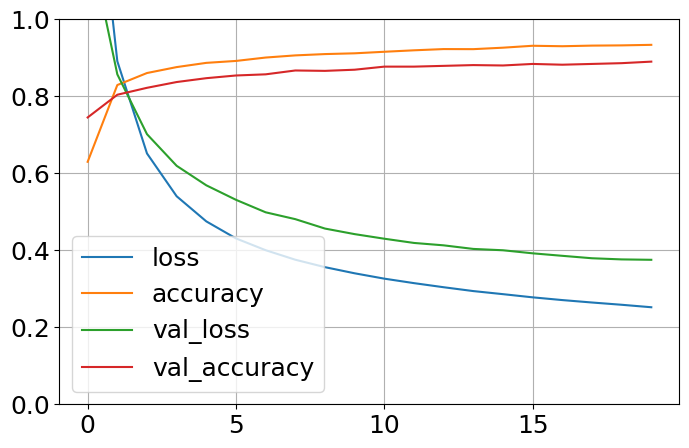

In [66]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [87]:
model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8950


[0.36684179306030273, 0.8949999809265137]

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 300)               235500    
                                                                 
 dense_44 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 1s 4ms/step - loss: 1.4685 - accuracy: 0.6300 - val_loss: 1.0656 - val_accuracy: 0.7460
Epoch 2/20
157/157 [==============================] - 1s 4ms/step - loss: 0.7839 - accuracy: 0.8346 - val_loss: 0.7748 - val_accuracy: 0.8100
Epoch 3/20
157/157 [=======

(0.0, 1.0)

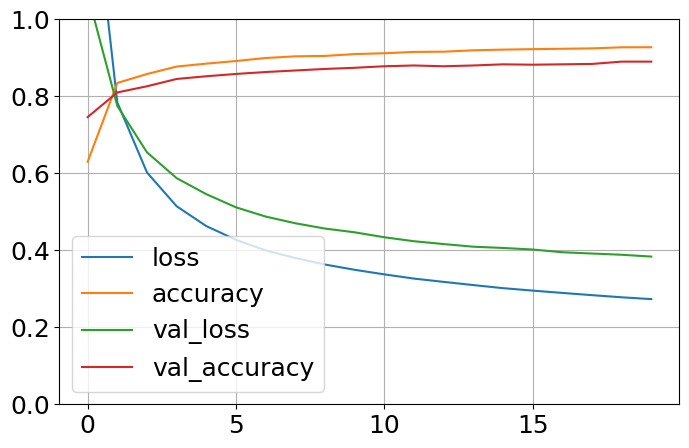

In [88]:
#tanh in the hidden layer. peak accuracy 0.9234
#too close to call whether tanh or relu is better. try again below with more epochs

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.Dense(300, activation = 'tanh'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #softmax works best when the target is a multicategorical

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=20,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [89]:
model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8900


[0.3836402893066406, 0.8899999856948853]

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 300)               235500    
                                                                 
 dense_46 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
157/157 [==============================] - 3s 16ms/step - loss: 1.6455 - accuracy: 0.5942 - val_loss: 1.2667 - val_accuracy: 0.7240
Epoch 2/40
157/157 [==============================] - 1s 4ms/step - loss: 0.9284 - accuracy: 0.8140 - val_loss: 0.8753 - val_accuracy: 0.8040
Epoch 3/40
157/157 [======

(0.0, 1.0)

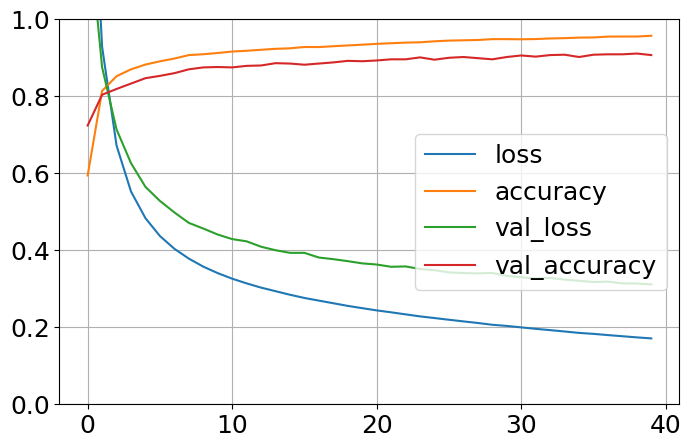

In [90]:
#relu, increasing epochs to 40
#0.9572

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) 

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [91]:
#1 dense layer, activation = relu

model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.9070


[0.31136104464530945, 0.9070000052452087]

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 300)               235500    
                                                                 
 dense_48 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
157/157 [==============================] - 1s 4ms/step - loss: 1.4851 - accuracy: 0.6282 - val_loss: 1.0661 - val_accuracy: 0.7670
Epoch 2/40
157/157 [==============================] - 1s 5ms/step - loss: 0.8090 - accuracy: 0.8210 - val_loss: 0.7846 - val_accuracy: 0.8050
Epoch 3/40
157/157 [=======

(0.0, 1.0)

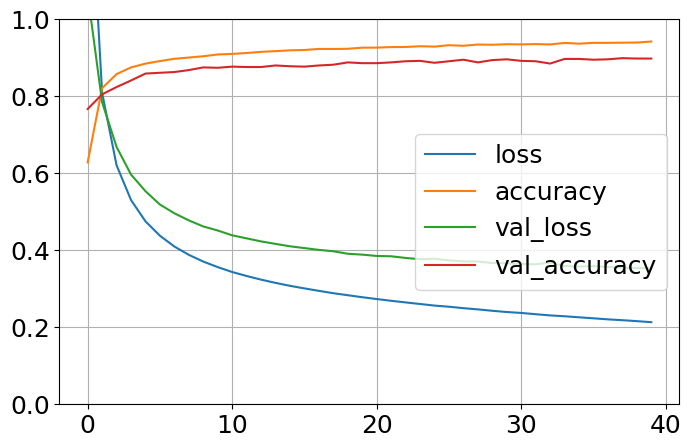

In [92]:
#tanh, increasing epochs to 40
#0.9422
#still too close to call, lets just stick with relu after this trial

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.Dense(300, activation = 'tanh'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #softmax works best when the target is a multicategorical

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [93]:
#1 dense layer, activation = tanh

model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8980


[0.3527243733406067, 0.8980000019073486]

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 300)               235500    
                                                                 
 dense_50 (Dense)            (None, 300)               90300     
                                                                 
 dense_51 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
157/157 [==============================] - 1s 6ms/step - loss: 1.8690 - accuracy: 0.5250 - val_loss: 1.4496 - val_accuracy: 0.7370
Epoch 2/40
157/157 [=================

(0.0, 1.0)

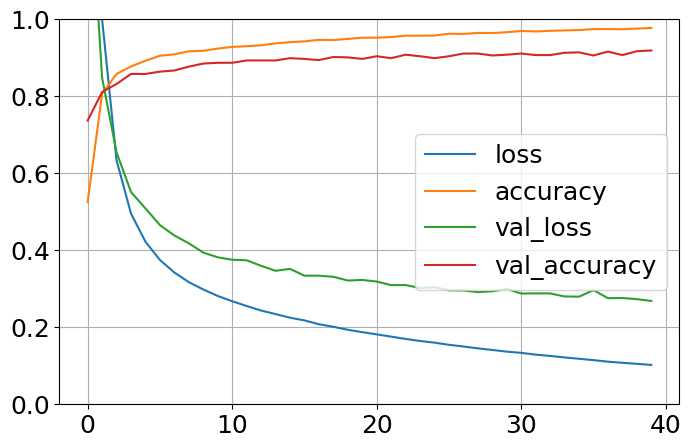

In [94]:
#relu, adding another hidden layer
#0.9758

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #softmax works best when the target is a multicategorical

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [79]:
#two dense layers, activation = relu

model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8960


[0.2926994562149048, 0.8960000276565552]

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 300)               235500    
                                                                 
 dense_39 (Dense)            (None, 300)               90300     
                                                                 
 dense_40 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
157/157 [==============================] - 1s 4ms/step - loss: 1.8680 - accuracy: 0.5254 - val_loss: 1.4839 - val_accuracy: 0.7050
Epoch 2/40
157/157 [=================

(0.0, 1.0)

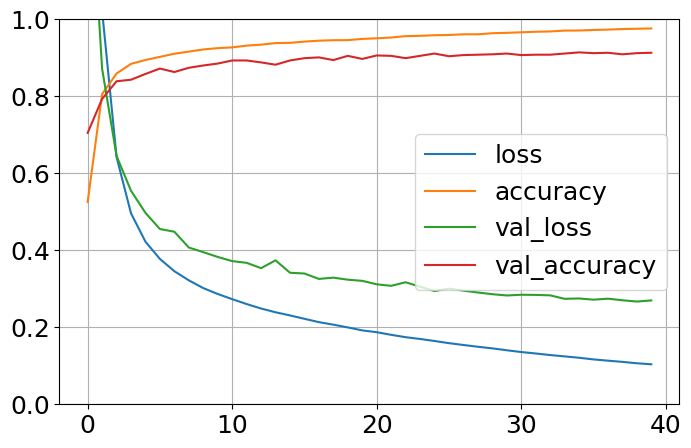

In [80]:
#before moving on, lets change the output activation function to sigmoid, which also works well with categoricals
#0.9788

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid'))

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [83]:
#two dense layers, activation = sigmoid

model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.9130


[0.26973986625671387, 0.9129999876022339]

Summary so far:

The target variable is being treated as a dummy variable the mnist target is a multicategorical. As such we're using softmax and sigmoid in the output layer. Sigmoid is a mild improvement over softmax.

In the hidden layers we're using relu for the activation function, which mildly outperforms tanh.

The problem challenges us to achieve 98% accuracy. Using only two dense layers and 40 epochs we've hit 91.30% on the testing data and 97.62% on the testing data. Let's see what else we can do to improve accuracy.

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 300)               235500    
                                                                 
 dense_53 (Dense)            (None, 300)               90300     
                                                                 
 dense_54 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
157/157 [==============================] - 2s 7ms/step - loss: 0.5474 - accuracy: 0.8396 - val_loss: 0.3473 - val_accuracy: 0.8880
Epoch 2/40
157/157 [=================

(0.0, 1.0)

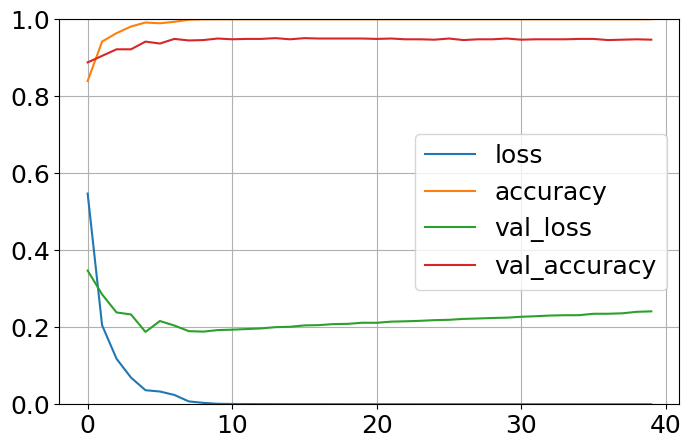

In [95]:
#change the optimizer to adam
#quickly achieves 1.000, which is very suspicious. Possibly overfitting

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) 

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Note that the training loss drops all the way to zero while validation loss remains constant and even begins to increase.

This is strong evidence that the model is overfitting!

In [96]:
#two dense layers, hidden activation = relu, ouptut activation = softmax, optimizer = adam

model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9470


[0.24137182533740997, 0.9470000267028809]

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_55 (Dense)            (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_56 (Dense)            (None, 300)               90300     
                                                                 
 dense_57 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
157/157 [===========================

(0.0, 1.0)

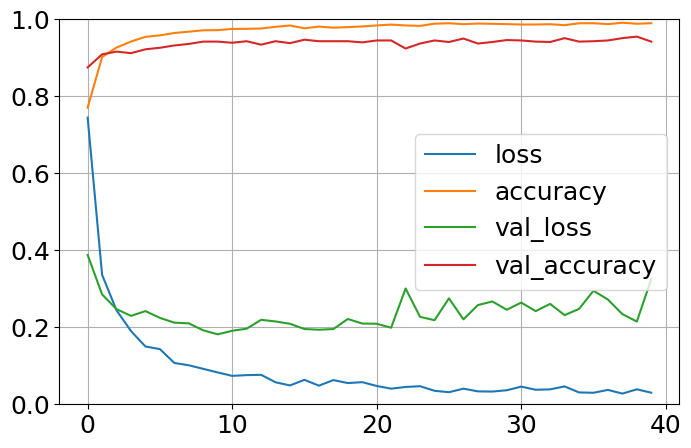

In [97]:
#to address the overfitting, we add a dropout layer
#0.9898

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dropout(0.5)) # Add dropout regularization
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid')) #softmax works best when the target is a multicategorical

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)


The overfitting behavior in the losses observed above is still present, though less pronounced.

This indicates the dropout layer did something to address the overfitting.

In [98]:
#two hidden layers, hidden activation = relu, output activation = sigmoid, optimizer = adam

model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.9420


[0.3252224028110504, 0.9419999718666077]

So by changing the optimizer to adam, we improved our accuracy. So much so that the model is probably overfitting.

To address this I added a dropout layer.

Evaluated on the testing data, we got an accuracy of 94.20%

There might still be some overfitting. We will continue to introduce this.

But first let's take a brief detour. Sometimes we're confronted with the problem of vanishing gradients. 

In [164]:
with tf.GradientTape() as tape:
    loss = model(model.trainable_weights)

grads = tape.gradient(loss, model.trainable_weights)

ValueError: Layer "sequential_25" expects 1 input(s), but it received 6 input tensors. Inputs received: [<tf.Variable 'dense_55/kernel:0' shape=(784, 300) dtype=float32, numpy=
array([[-0.00250929, -0.00770933,  0.0412235 , ...,  0.03223931,
        -0.03242263,  0.06957403],
       [-0.04167259, -0.06615549, -0.01461643, ..., -0.00555886,
         0.06322323, -0.03100343],
       [-0.0108806 ,  0.04250336,  0.04230344, ..., -0.04306228,
        -0.07008164,  0.00819987],
       ...,
       [-0.05592339, -0.04866866,  0.04354829, ..., -0.00029965,
         0.00086141, -0.05731388],
       [ 0.0691558 ,  0.03097206,  0.05095856, ...,  0.04992124,
        -0.06991524, -0.02018185],
       [ 0.03179952, -0.04075456, -0.05646857, ..., -0.01826328,
         0.00710211, -0.0206854 ]], dtype=float32)>, <tf.Variable 'dense_55/bias:0' shape=(300,) dtype=float32, numpy=
array([-0.06791227, -0.03166802, -0.07878322,  0.01994991, -0.08041738,
       -0.08934873, -0.0229536 , -0.01640318,  0.06746923, -0.00576847,
        0.03940465,  0.04253811, -0.01811846,  0.05272248,  0.00488149,
       -0.11717415, -0.0386749 , -0.04110079,  0.00875214, -0.0272901 ,
       -0.00996001, -0.03980242, -0.06982339, -0.00419536,  0.02104872,
        0.04864381, -0.02276077,  0.07145176,  0.00179025,  0.01261413,
       -0.06348728,  0.00958411, -0.03357383, -0.0442519 ,  0.00313138,
        0.01058594, -0.00336852, -0.05258487,  0.02059522,  0.02118797,
       -0.05284397,  0.03759876,  0.04494659,  0.02346251,  0.0544856 ,
        0.05437919, -0.00474568,  0.03271433, -0.02616186, -0.04838226,
        0.08510999,  0.00877146, -0.00028449, -0.00771795,  0.08073553,
        0.04299165,  0.00096624,  0.01489229,  0.02839151,  0.02104565,
       -0.00797591, -0.0563493 , -0.03912564, -0.00720556,  0.01269164,
       -0.01440584,  0.03740276, -0.09497727,  0.00343384,  0.02458279,
       -0.04875448, -0.0042418 ,  0.01883099,  0.00354803, -0.03832238,
       -0.0954595 ,  0.00557899,  0.03493606,  0.05682031,  0.00150048,
       -0.00068475, -0.03197915,  0.04286473, -0.03651689,  0.0270886 ,
        0.01991777, -0.05043151, -0.04342711,  0.00019328,  0.05151092,
        0.01692909, -0.02299952, -0.01847021, -0.05936296, -0.05456416,
       -0.00260922,  0.01621924, -0.08752789, -0.04441139, -0.07959954,
        0.01838855, -0.05841507, -0.04701886, -0.03878469, -0.00780565,
       -0.07923073,  0.01027003,  0.04579453, -0.05143878,  0.00125916,
       -0.03046339,  0.03900723,  0.02040328,  0.04495182,  0.05857798,
       -0.0712561 ,  0.02663477,  0.01624633, -0.06403147, -0.09202199,
       -0.0731423 , -0.03315812, -0.02227175,  0.0292646 , -0.06668311,
       -0.02853752, -0.0288574 , -0.04469371, -0.00738418,  0.00152023,
        0.0331536 , -0.03007396, -0.03760547, -0.01717506,  0.0023432 ,
       -0.08894853,  0.04325221, -0.03044921, -0.03369981, -0.00768397,
       -0.08398139,  0.05273977,  0.05554281,  0.01182794, -0.07991704,
       -0.00988575, -0.03454953,  0.05735942,  0.0196272 , -0.00849315,
        0.02237301,  0.03092662, -0.07481887, -0.04811863, -0.02347107,
       -0.0492161 , -0.00283957, -0.04074104, -0.10350177,  0.04480988,
        0.07021272,  0.00477471, -0.07107115, -0.03313225, -0.02877733,
       -0.00056174, -0.03305635, -0.00100378,  0.00079655,  0.01072162,
        0.01078704,  0.03064441,  0.01284038, -0.01383923, -0.01192634,
       -0.01442925,  0.02979119,  0.02677091,  0.08460901,  0.05980986,
       -0.07805809, -0.00416827, -0.04636838, -0.01891555,  0.02609241,
        0.0146319 , -0.007057  , -0.06615064, -0.05185125, -0.08185074,
        0.03777545, -0.01569817, -0.05141588, -0.08496697,  0.01906822,
        0.03317108, -0.02571625,  0.01752986,  0.00357621, -0.00042699,
        0.0300808 , -0.0510593 , -0.02487242,  0.04605151, -0.0090131 ,
       -0.03980007,  0.009543  ,  0.05165957, -0.06258325, -0.0154636 ,
       -0.02881468,  0.03607034, -0.02629034, -0.04531076, -0.01747081,
        0.0127836 ,  0.01534994, -0.01365082,  0.05140124,  0.0724543 ,
       -0.04300645,  0.02361601,  0.02519134,  0.03536518, -0.01075676,
       -0.01873096, -0.04650247, -0.02349589,  0.01297408,  0.04444969,
       -0.06733941,  0.01084012, -0.0569363 , -0.10790434,  0.0018069 ,
       -0.03197993, -0.02219469, -0.06684438,  0.06666196, -0.07196244,
       -0.04559215,  0.02598442,  0.02755305,  0.01897593, -0.08445954,
        0.05991887, -0.05021888, -0.03635902,  0.0485369 ,  0.01694869,
       -0.04880957,  0.03734244, -0.06766488, -0.01246021, -0.08676624,
       -0.05275471, -0.08025223, -0.01315182, -0.02459658, -0.11080144,
        0.00403073, -0.0514418 ,  0.0379541 ,  0.02722863,  0.00264086,
       -0.05534343, -0.03869129, -0.02915864, -0.07973515, -0.02335498,
       -0.07354102,  0.02255676,  0.00301396,  0.00223738, -0.01833342,
       -0.01173844,  0.00481972, -0.08837765, -0.00351124, -0.03695863,
        0.00686891, -0.07009787,  0.04297802, -0.06269976, -0.08329714,
       -0.08956426,  0.05857781, -0.01916031,  0.10900793, -0.05575071,
       -0.04833227, -0.09830481, -0.06086788, -0.02733474,  0.0076925 ,
        0.00906   ,  0.04441182,  0.0256196 ,  0.00030047,  0.00510181],
      dtype=float32)>, <tf.Variable 'dense_56/kernel:0' shape=(300, 300) dtype=float32, numpy=
array([[ 0.07623167,  0.1737683 , -0.06737462, ..., -0.0864961 ,
        -0.02949709, -0.00534353],
       [-0.12347864,  0.05288213, -0.08570245, ..., -0.0709144 ,
        -0.00360468,  0.01959728],
       [ 0.10850684,  0.03526517, -0.04706953, ..., -0.05330711,
        -0.08896878, -0.06122528],
       ...,
       [-0.11970735, -0.01330481,  0.00676062, ..., -0.07550346,
        -0.02040544, -0.11954401],
       [ 0.05475309,  0.13202867,  0.10850889, ...,  0.04314731,
         0.09666818,  0.03540906],
       [ 0.16298153, -0.05946856, -0.06661104, ..., -0.1461434 ,
        -0.10932349, -0.08100276]], dtype=float32)>, <tf.Variable 'dense_56/bias:0' shape=(300,) dtype=float32, numpy=
array([ 1.08715676e-01,  6.36604354e-02, -1.60790998e-02,  9.95127037e-02,
       -6.12277240e-02,  8.97490755e-02,  8.52860063e-02, -7.81500936e-02,
       -7.55297812e-03, -8.96117985e-02, -2.81309467e-02, -3.29263695e-02,
        1.51662722e-01,  1.30187005e-01, -3.89020368e-02,  9.71013606e-02,
       -6.95111509e-03, -2.08150353e-02, -3.89611386e-02, -2.93878969e-02,
       -3.93694937e-02,  4.69279028e-02,  9.27040279e-02, -6.66942298e-02,
       -6.17393181e-02,  9.66352746e-02, -2.57534608e-02,  9.94246602e-02,
        1.86882168e-02, -3.44025344e-02,  1.08257003e-01, -1.22328289e-02,
        7.91317597e-02, -4.97953817e-02,  9.10266787e-02,  1.18991606e-01,
        6.00809045e-02, -1.76873263e-02,  3.24357152e-02, -8.93946271e-03,
        1.26184877e-02, -4.64746095e-02,  9.48122740e-02,  5.15143238e-02,
        2.75380556e-02,  1.32403374e-01, -9.04195532e-02,  1.24545716e-01,
        8.37875977e-02, -2.61274143e-03,  6.46227747e-02, -8.81050155e-02,
        2.17717029e-02, -1.98397860e-02,  5.67885600e-02, -2.58953050e-02,
        7.02746678e-03, -9.13640410e-02,  2.68197600e-02, -1.02615342e-01,
       -4.30284590e-02, -3.86642814e-02, -3.61636579e-02,  2.75404416e-02,
        1.49216037e-02, -8.41366500e-02,  8.96779180e-04,  6.10714629e-02,
        3.52765061e-02,  9.83837545e-02, -8.82147104e-02, -2.29349192e-02,
       -4.59840558e-02,  7.47680292e-02, -1.23796538e-02,  1.20065667e-01,
       -6.51303902e-02,  6.11331314e-03,  1.17196469e-05, -1.66571047e-02,
       -5.14684878e-02, -3.08729187e-02,  4.66016568e-02,  6.37912825e-02,
        4.44178544e-02,  4.34482098e-02,  3.76241431e-02, -3.92669365e-02,
       -2.66575646e-02,  1.05146371e-01,  1.32084846e-01,  1.59294754e-02,
        3.08581237e-02, -8.61932561e-02,  6.68885410e-02,  1.05683657e-03,
       -1.52813150e-02, -4.97569926e-02,  1.33992285e-01, -1.96600147e-02,
       -8.08346272e-03,  1.78914866e-03,  3.94326597e-02, -1.11967279e-02,
       -8.82932357e-03, -4.76418957e-02, -7.70497620e-02,  3.14287245e-02,
        2.20526811e-02, -7.77667435e-03, -9.42389965e-02, -9.11484882e-02,
        4.96004745e-02, -1.34182364e-01, -3.82851698e-02, -7.45913088e-02,
       -4.82485108e-02,  2.85401638e-03, -1.29636511e-01,  8.24996904e-02,
        5.48949726e-02,  2.76125148e-02, -2.04740576e-02, -1.01788505e-03,
        8.02363921e-03, -1.99859571e-02,  8.00410584e-02, -1.20535411e-01,
        1.08529508e-01,  1.48795068e-01, -3.17437463e-02,  9.34626013e-02,
        4.70623672e-02,  5.94405122e-02,  8.93655512e-03,  5.65743633e-02,
        8.86561722e-02, -3.06032654e-02, -7.74168223e-02,  6.69101626e-02,
       -9.63892937e-02,  1.70071386e-02, -3.46278423e-03,  3.65484394e-02,
        3.55232731e-02,  4.82360162e-02, -1.75821222e-02, -7.54214227e-02,
        1.23912781e-01, -5.27531616e-02, -2.80474219e-02, -3.08802235e-03,
       -4.04841490e-02,  6.79789111e-02,  9.85240489e-02, -1.23396002e-01,
        1.03567205e-01,  2.39489209e-02,  6.43894225e-02,  6.75708801e-02,
        1.19844370e-01,  4.37602736e-02,  3.12926099e-02, -7.04624876e-02,
       -5.92621490e-02, -7.73005709e-02, -8.16091150e-03, -1.65148266e-02,
       -6.14758097e-02,  1.44789964e-01,  4.64371406e-02,  5.19615971e-02,
        1.23231359e-01,  1.16354972e-01, -3.71063016e-02, -4.58105952e-02,
        6.56630844e-02, -1.12197757e-01,  8.36739391e-02,  8.54446068e-02,
        3.97204421e-02, -5.13641126e-02, -5.57154603e-02, -7.17807785e-02,
        7.81146884e-02, -3.48594412e-02,  6.70157075e-02, -6.60583526e-02,
       -5.34629934e-02, -1.59252733e-02, -1.38946492e-02,  3.53638525e-03,
       -5.15518114e-02,  6.42867908e-02,  8.10897499e-02, -3.96544263e-02,
        3.24860141e-02, -1.54967653e-03,  2.25660857e-02, -5.86767495e-02,
       -9.10331961e-03,  8.15895051e-02, -4.25979123e-02, -7.85451159e-02,
       -1.11565970e-01, -1.13738701e-01,  5.45093231e-02, -1.34851849e-02,
        5.35081699e-03, -3.31986472e-02,  8.92884359e-02,  6.34087175e-02,
        3.12942043e-02,  6.75931340e-03, -4.12598029e-02,  1.46053091e-01,
       -4.46943827e-02,  3.80406864e-02,  1.89404581e-02, -1.86797534e-03,
        1.32620662e-01, -5.47154807e-02, -7.43374899e-02, -1.26301288e-03,
       -8.94512311e-02, -3.69836874e-02, -1.40284579e-02, -6.82404041e-02,
       -7.19984919e-02, -8.69400874e-02, -7.18425354e-03,  7.25472569e-02,
       -3.61244082e-02, -1.43824210e-02, -6.25171810e-02, -9.96646360e-02,
       -3.78003344e-02, -3.43273170e-02, -5.53483628e-02,  2.50242744e-02,
        9.04123783e-02,  9.19130519e-02,  5.53397797e-02, -7.23035112e-02,
        3.63170430e-02,  1.12649120e-01, -6.85783103e-02,  2.82717347e-02,
       -5.94397038e-02,  1.83129311e-01,  8.17142278e-02, -4.73477356e-02,
       -6.59907470e-03, -8.97845626e-02,  8.28053057e-02,  9.36536044e-02,
        1.18285567e-01, -3.78666520e-02, -6.15340360e-02,  2.75637563e-02,
        1.63195506e-01, -9.44386125e-02, -9.19992998e-02, -9.35480595e-02,
       -9.00054574e-02, -2.07693223e-02,  1.02668084e-01,  1.32473469e-01,
       -3.93996388e-02,  8.02725628e-02, -3.13121751e-02, -4.40784357e-02,
        1.24605201e-01, -6.70650005e-02,  6.79632276e-02, -1.25764739e-02,
        1.41785562e-01, -3.46030071e-02, -5.35152033e-02, -8.64520371e-02,
        5.28931692e-02,  2.59296950e-02, -5.63224629e-02,  1.54573336e-01,
        2.32382864e-02, -3.54545452e-02,  1.59479107e-03,  7.97133446e-02,
        3.82493734e-02,  1.67874135e-02, -3.17950398e-02, -8.47209543e-02,
       -8.96349025e-04,  7.72034451e-02, -9.74539609e-04,  1.22818336e-01,
        3.77087407e-02,  9.59748775e-02, -2.52252910e-02, -2.03349330e-02],
      dtype=float32)>, <tf.Variable 'dense_57/kernel:0' shape=(300, 10) dtype=float32, numpy=
array([[-0.11173837,  0.15225153, -0.09241167, ...,  0.1166133 ,
         0.1417808 ,  0.16801174],
       [-0.22541532, -0.03303201,  0.18669878, ...,  0.03096614,
         0.08254095, -0.14247657],
       [ 0.05367475, -0.18529691, -0.09016608, ...,  0.0069337 ,
         0.09164464,  0.02529197],
       ...,
       [ 0.13021097,  0.03181805, -0.14617121, ..., -0.16976756,
         0.18355186, -0.02510112],
       [ 0.21391553, -0.25842258, -0.02399397, ..., -0.18546717,
        -0.06717454,  0.08657787],
       [ 0.12339617,  0.10777485, -0.0143666 , ...,  0.09103377,
         0.06927928,  0.06533164]], dtype=float32)>, <tf.Variable 'dense_57/bias:0' shape=(10,) dtype=float32, numpy=
array([-0.00035594, -0.04345552, -0.0298825 , -0.00417806, -0.00873961,
       -0.06833799, -0.05460929, -0.09856384,  0.15729877,  0.07662295],
      dtype=float32)>]

In [165]:
for i in range(5):
    display(grads[i])

<tf.Tensor: shape=(784, 300), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([ 2.45484519e+00,  4.89828259e-01, -1.22198319e+00, -1.76911843e+00,
        4.75697488e-01, -5.32292724e-02, -3.17598251e-03, -4.52401340e-01,
       -2.08979821e+00, -1.81589991e-01, -5.95529266e-02,  1.97865474e+00,
        1.41389251e-01, -4.57688570e-01, -1.36470330e+00, -1.37977423e-02,
       -1.84271298e-02, -2.38347363e+00, -1.58208430e-01, -1.52333021e+00,
        2.47092891e+00, -2.57563621e-01, -2.52843380e-01, -5.10506630e-01,
       -6.24150872e-01, -2.52556533e-01, -1.23167503e+00, -1.50333464e-01,
       -3.12878221e-01, -2.46635765e-01, -1.77879477e+00,  2.89686561e-01,
       -4.17240828e-01, -4.22653975e-03,  9.69640672e-01, -1.83689132e-01,
        8.45728159e-01, -2.54663855e-01, -3.56017113e-01, -8.04458261e-01,
        1.96854800e-01, -1.21969298e-01, -1.82834953e-01, -8.93972993e-01,
       -1.86386907e+00, -5.29501215e-02, -1.95504880e+00,  5.50074518e-01,
        1.81291401e+00,  3.88356209e-01,  2.37952352

<tf.Tensor: shape=(300, 300), dtype=float32, numpy=
array([[ 7.5723362e-01, -1.3427273e+00, -1.2019986e-01, ...,
        -7.4771369e-01,  3.9576475e-02,  3.7409777e-03],
       [ 1.6856182e-04, -2.7729371e-03,  0.0000000e+00, ...,
        -2.0560868e-04,  1.9707470e-03,  8.2890748e-04],
       [ 1.3470973e-01, -1.4542185e-01, -3.5796550e-03, ...,
        -1.1502731e-01,  3.7085705e-03,  2.7134961e-03],
       ...,
       [ 1.1941124e-03, -1.8549833e-02, -3.3120992e-05, ...,
        -1.2220189e-02,  3.5070237e-02,  1.6554743e-02],
       [-1.1845160e-02,  3.7285113e-03, -1.7593120e-04, ...,
         6.8096735e-05, -1.1652514e-03, -3.4749981e-03],
       [ 3.1439951e-01, -1.8956048e-02,  4.6148803e-03, ...,
        -1.8327192e-03,  2.6993626e-03, -9.5628314e-03]], dtype=float32)>

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([ 5.84912539e-01, -8.29214871e-01, -8.72830078e-02,  7.73093402e-01,
       -2.02102304e-01,  2.95581162e-01, -3.28015506e-01, -6.55686140e-01,
        9.92826894e-02, -2.03136086e-01, -5.63105762e-01, -5.01730919e-01,
        2.11094528e-01, -6.63428843e-01, -8.74458253e-01, -5.31033099e-01,
        7.22856522e-01, -3.20265740e-01, -4.43154126e-01, -6.29238971e-03,
        4.72062789e-02,  2.90292561e-01, -5.95365822e-01,  6.43550098e-01,
       -2.12513521e-01,  2.42512792e-01, -7.89489806e-01,  1.57839894e-01,
        2.11432436e-03,  1.23068884e-01,  1.05928481e+00,  1.26399651e-01,
       -1.25533712e+00, -1.12203443e-02, -2.48511702e-01, -5.52655756e-01,
       -3.13614309e-01,  9.28538218e-02,  1.00486100e+00,  8.69644523e-01,
       -2.32089475e-01,  3.73745054e-01, -3.97979528e-01,  4.25613433e-01,
       -4.47504878e-01,  5.49510598e-01, -9.09928828e-02,  1.02032697e+00,
       -1.38277963e-01,  5.24665117e-02, -4.23969179

<tf.Tensor: shape=(300, 10), dtype=float32, numpy=
array([[-5.5689602e-03, -4.0676370e-03, -1.1508423e-01, ...,
        -1.5849504e+00, -2.4906108e+00,  6.4889264e+00],
       [ 1.8722551e-02, -1.3656301e+00,  1.9997430e-01, ...,
        -3.8302174e-01, -3.4609580e+00,  5.0034723e+00],
       [ 9.8960063e-06,  3.3217017e-04,  4.2286945e-05, ...,
         1.0424296e-04, -3.8310635e-01,  3.8229907e-01],
       ...,
       [-4.2173858e-03,  7.1490309e-03,  5.8652740e-03, ...,
         2.8639287e-03, -3.0419412e+00,  3.0142879e+00],
       [ 2.9901857e-03, -1.1521691e-02,  5.6420201e-03, ...,
         3.2577285e-04, -3.3080932e-02,  9.1176275e-03],
       [ 4.6801925e-02, -6.2420326e-03, -7.3528350e-03, ...,
        -1.3249490e-01, -1.3255458e-01,  2.3731908e-01]], dtype=float32)>

It is difficult to say for sure just by inspecting, but these are values several orders of magnitude smaller than the input data. We may be experiencing vanishing gradients. 

We can address this using batch normalization. This will introduce non-trainable parameters into our model for the first time.

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_58 (Dense)            (None, 300)               235500    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_59 (Dense)            (None, 300)             

(0.0, 1.0)

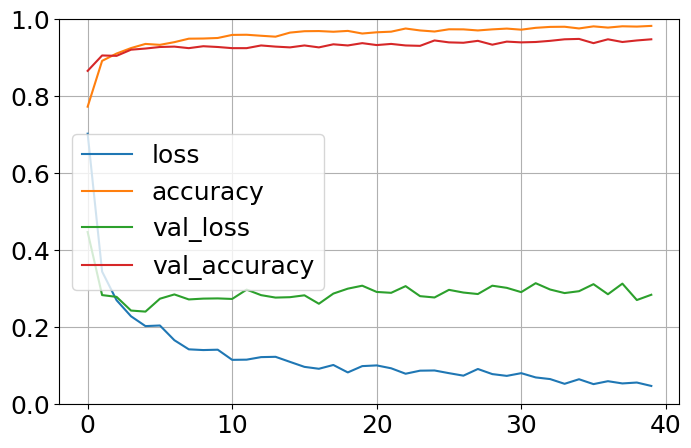

In [166]:
#0.9828

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dropout(0.5)) # Add dropout regularization
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid')) 

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Hm. The overfitting problems with validation loss and training loss aren't as pronounced as in previous trials.

The fact that training accuracy (mildly decreased) while validation accuracy (below) mildly increased suggests that the batch layers contributed a little bit to reverse any overfitting that may be happening.

In [167]:
model.evaluate(X_test, y_testd)
#this is a mild improvement in accuracy

32/32 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.9480


[0.284461110830307, 0.9480000138282776]

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_36 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_15 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_79 (Dense)            (None, 300)               235500    
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 batch_normalization_16 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_80 (Dense)            (None, 300)             

(0.0, 1.0)

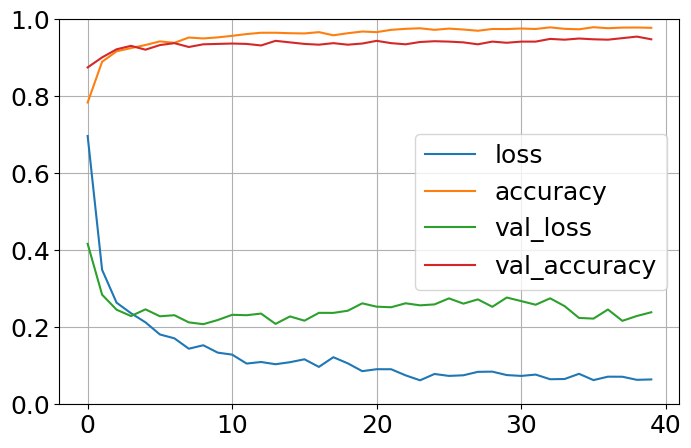

In [182]:
#introduce a callback

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dropout(0.5)) # Add dropout regularization
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid')) 

model.summary()

checkpoint_cb = keras.callbacks.ModelCheckpoint(model.trainable_weights, save_best_only=True)

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [183]:
model.evaluate(X_test, y_testd)

32/32 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.9480


[0.23900315165519714, 0.9480000138282776]

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_37 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_17 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_82 (Dense)            (None, 300)               235500    
                                                                 
 dropout_10 (Dropout)        (None, 300)               0         
                                                                 
 batch_normalization_18 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_83 (Dense)            (None, 300)             

(0.0, 1.0)

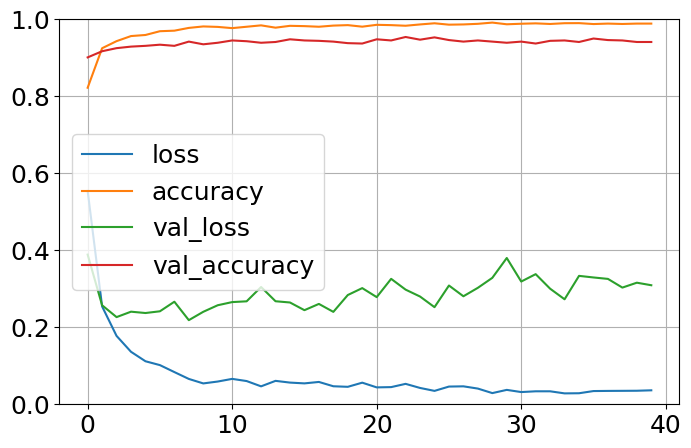

In [184]:
#change the dropout rate, no callback

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dropout(0.3)) # Add dropout regularization
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid')) 

model.summary()


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_traind, epochs=40,
                    validation_data=(X_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

The loss and val_loss behavior indicates that more overfitting is happening now. Thus, the dropout rate is probably too low.

Now let's run the model on the entire data set.

In [186]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

X_train_full = X_train_full.reshape(-1, 28*28)
X_test_full = X_test_full.reshape(-1, 28*28)

y_traind_full = pd.get_dummies(y_train_full)
y_testd_full = pd.get_dummies(y_test_full)

X_train_full, X_test_full = X_train_full/255., X_test_full/255.

print("X_train_full shape:", X_train_full.shape)
print('y_train_full shape_full:', y_train_full.shape)
print('X_test_full shape_full:', X_test_full.shape)
print('y_test_full shape:', y_test_full.shape)

X_train_full shape: (60000, 784)
y_train_full shape_full: (60000,)
X_test_full shape_full: (10000, 784)
y_test_full shape: (10000,)


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_38 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_19 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_85 (Dense)            (None, 300)               235500    
                                                                 
 dropout_11 (Dropout)        (None, 300)               0         
                                                                 
 batch_normalization_20 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_86 (Dense)            (None, 300)             

(0.0, 1.0)

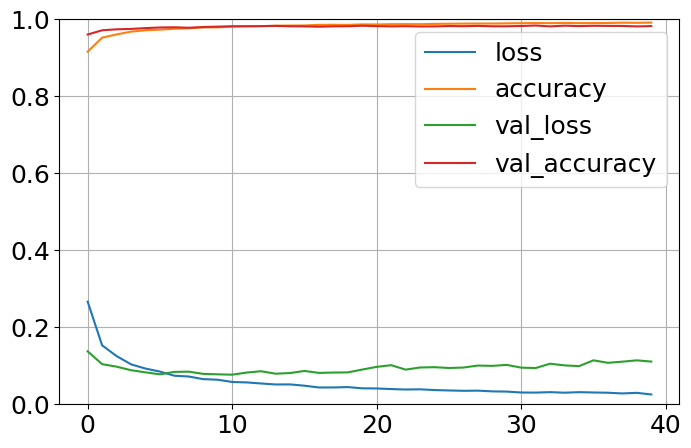

In [187]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim = 784))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dropout(0.3)) # Add dropout regularization
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid')) 

model.summary()


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_full, y_traind_full, epochs=40,
                    validation_data=(X_test_full, y_testd_full))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Note that this is pretty close to ideal. Very high accuracy scores, validation loss doesn't trend too much upwards towards the end. Overall validation losses are about 1/3 of what they were in the previous trial. Thus by training on the entire data set, we reduced any problem of overfitting.

Now for the grand finale:

In [188]:
model.evaluate(X_test_full, y_testd_full)

313/313 [==============================] - 1s 3ms/step - loss: 0.1109 - accuracy: 0.9823


[0.11088984459638596, 0.9822999835014343]

We did it! Accuracy on the testing data of 98.23%.

Mission accomplished!

In [202]:
model.save("mnist_keras_model.h5")

### Problem 2:

Train a deep neural network on the MRI slices dataset. Try to get demonstrably better accuracy than classifying everything as the same label. In this case, it may be helpful to _restrict_ the number of trainable parameters, sacrificing bias for reduction in variance. 

In Lab 3 we discovered that it's better to treat the target variable as a categorical.

We will do so below.

In [190]:
file_dir = 'C:/Users/burch/OneDrive/Documents/MRI_Slices/'

labels = pd.read_csv(file_dir + 'labels.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Filename
0,0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_44.png
1,1,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_86.png
2,2,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_128.png
3,3,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_44.png
4,4,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_86.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_86.png
698,698,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_128.png
699,699,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_44.png
700,700,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_86.png


In [192]:
from matplotlib import pyplot as plt
import matplotlib

data = np.zeros([702, 36608])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

    
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(561,) (141,)


In [193]:
DS = 8             # Downsample rate, must be a factor of 36608

N_train = y_train.shape[0]  # The length of the training data
y_train = np.array(y_train)

if 36608/DS % 1 > 0:
    print("Downsample rate is not a multiple of 36608")
    DS = 1
    im_size = 36608
else:
    im_size = int(36608/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros([N_train*DS])
   
for n in range(N_train):
    for i in range(DS):
        Xds_train[n*DS+i,:] = X_train[n,i::DS]
        yds_train[n*DS+i] = y_train[n]

In [194]:
Xds_train.shape

(4488, 4576)

In [195]:
yds_train.shape

(4488,)

In [199]:
#testing data
y_test = np.matrix(y_test)

Xds_test = np.zeros([141*DS, im_size])
yds_test = np.zeros([141*DS])

for n in range(140):
    for i in range(DS):
        Xds_test[n*DS+i,:] = X_test[n,i::DS]
        yds_test[n*DS+i] = y_test[0,n]

print(Xds_test.shape)
print(yds_test.shape)

(1128, 4576)
(1128,)


In [201]:
y_traind = pd.get_dummies(yds_train)
y_testd = pd.get_dummies(yds_test)

In [210]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))

MRI_model.add(keras.layers.Dense(300, activation = 'relu'))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_42 (Flatten)        (None, 4576)              0         
                                                                 
 dense_94 (Dense)            (None, 300)               1373100   
                                                                 
 dense_95 (Dense)            (None, 4)                 1204      
                                                                 
Total params: 1,374,304
Trainable params: 1,374,304
Non-trainable params: 0
_________________________________________________________________


In [211]:
MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

Epoch 1/20
141/141 [==============================] - 4s 22ms/step - loss: 1.4261 - accuracy: 0.5087 - val_loss: 1.2397 - val_accuracy: 0.5372
Epoch 2/20
141/141 [==============================] - 3s 19ms/step - loss: 1.0057 - accuracy: 0.5488 - val_loss: 1.4436 - val_accuracy: 0.3174
Epoch 3/20
141/141 [==============================] - 3s 19ms/step - loss: 0.9310 - accuracy: 0.5775 - val_loss: 1.1258 - val_accuracy: 0.4805
Epoch 4/20
141/141 [==============================] - 3s 20ms/step - loss: 0.8740 - accuracy: 0.6065 - val_loss: 1.2058 - val_accuracy: 0.5426
Epoch 5/20
141/141 [==============================] - 3s 19ms/step - loss: 0.8483 - accuracy: 0.6321 - val_loss: 0.9805 - val_accuracy: 0.5496
Epoch 6/20
141/141 [==============================] - 3s 19ms/step - loss: 0.7895 - accuracy: 0.6477 - val_loss: 1.3180 - val_accuracy: 0.3121
Epoch 7/20
141/141 [==============================] - 3s 19ms/step - loss: 0.7271 - accuracy: 0.6698 - val_loss: 1.2117 - val_accuracy: 0.4512

In [213]:
MRI_model.evaluate(Xds_test, y_testd)

36/36 [==============================] - 0s 3ms/step - loss: 1.4480 - accuracy: 0.5541


[1.4479622840881348, 0.5540780425071716]

The huge difference between testing accuracy and validation accuracy indicates there's definitely some overfitting taking place.

(0.0, 1.0)

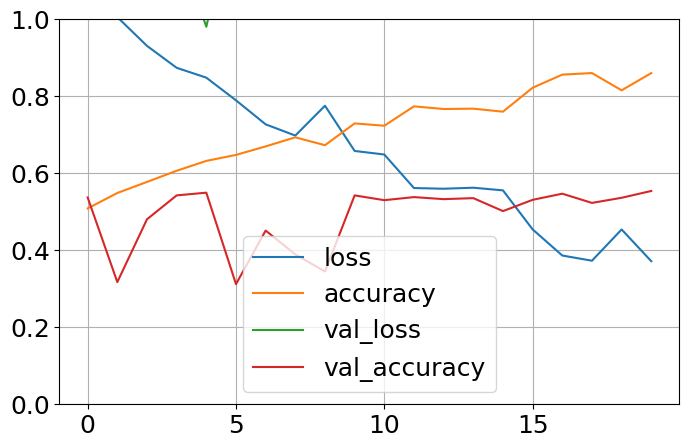

In [212]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Indeed there is something pathological taking place. Notice that validation loss is literally off the charts. Lets see if a dropout layer helps. I'll set the dropout rate pretty high considering just how badly we're overfitting.

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_44 (Flatten)        (None, 4576)              0         
                                                                 
 dense_98 (Dense)            (None, 300)               1373100   
                                                                 
 dropout_12 (Dropout)        (None, 300)               0         
                                                                 
 dense_99 (Dense)            (None, 4)                 1204      
                                                                 
Total params: 1,374,304
Trainable params: 1,374,304
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 4s 22ms/step - loss: 1.2915 - accuracy: 0.5388 - val_loss: 1.0549 - val_accuracy: 0.5461
Epoch 2/20
141/141 [============

(0.0, 1.0)

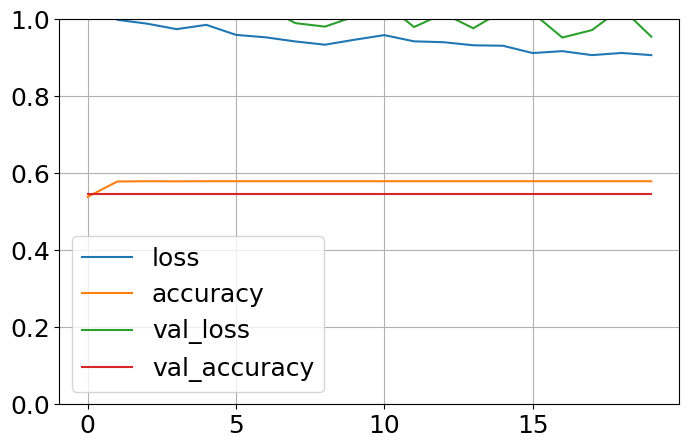

In [215]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(300, activation = 'relu'))
MRI_model.add(keras.layers.Dropout(0.5))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [216]:
MRI_model.evaluate(Xds_test, y_testd)

36/36 [==============================] - 0s 3ms/step - loss: 0.9548 - accuracy: 0.5461


[0.9548383355140686, 0.5460993051528931]

This seems to have been an overcorrection. The model now appears to be underfitting. This is probably because the dimensionality is significantly higher than previous (4576 in this problem compared to 784 in the previous) Let's reduce the dropout rate and add another hidden layer.

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_45 (Flatten)        (None, 4576)              0         
                                                                 
 dense_100 (Dense)           (None, 300)               1373100   
                                                                 
 dropout_13 (Dropout)        (None, 300)               0         
                                                                 
 dense_101 (Dense)           (None, 300)               90300     
                                                                 
 dense_102 (Dense)           (None, 4)                 1204      
                                                                 
Total params: 1,464,604
Trainable params: 1,464,604
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [=======================

(0.0, 1.0)

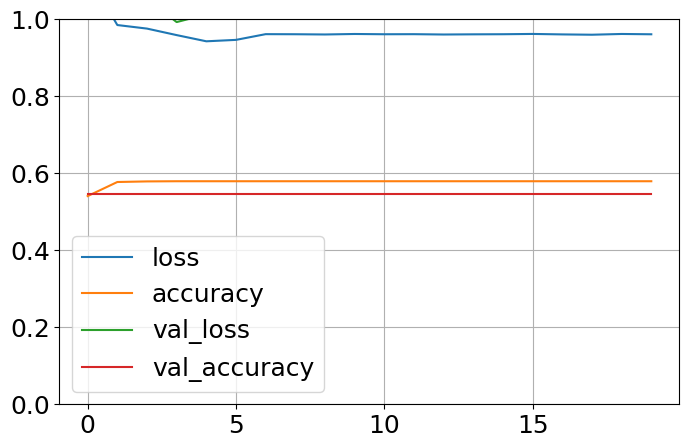

In [217]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(300, activation = 'relu'))
MRI_model.add(keras.layers.Dropout(0.3))
MRI_model.add(keras.layers.Dense(300, activation = 'relu'))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

That didn't help. The instructions recommend reducing the number of parameters by sacrificing bias. Let's give that a try

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_46 (Flatten)        (None, 4576)              0         
                                                                 
 dense_103 (Dense)           (None, 300)               1372800   
                                                                 
 dropout_14 (Dropout)        (None, 300)               0         
                                                                 
 dense_104 (Dense)           (None, 300)               90000     
                                                                 
 dense_105 (Dense)           (None, 4)                 1204      
                                                                 
Total params: 1,464,004
Trainable params: 1,464,004
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [=======================

(0.0, 1.0)

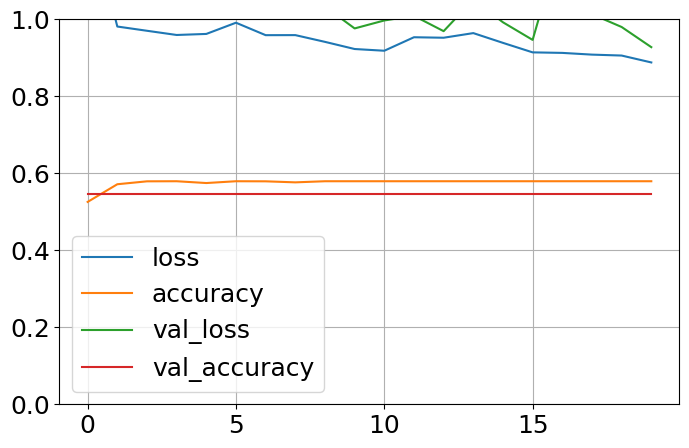

In [218]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dropout(0.3))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_47 (Flatten)        (None, 4576)              0         
                                                                 
 dense_106 (Dense)           (None, 500)               2288000   
                                                                 
 dense_107 (Dense)           (None, 500)               250000    
                                                                 
 dense_108 (Dense)           (None, 500)               250000    
                                                                 
 dense_109 (Dense)           (None, 4)                 2004      
                                                                 
Total params: 2,790,004
Trainable params: 2,790,004
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [=======================

(0.0, 1.0)

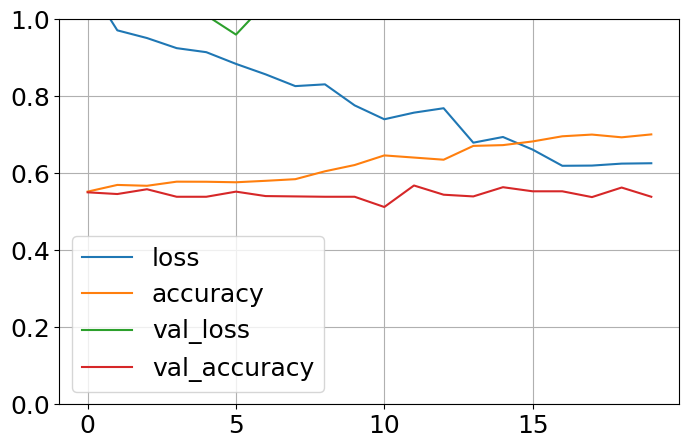

In [219]:
#increase the number of nodes
#get rid of the dropout layer
#add a dense layer

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(500, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(500, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(500, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [221]:
MRI_model.evaluate(Xds_test, y_testd)

36/36 [==============================] - 0s 6ms/step - loss: 1.1485 - accuracy: 0.5390


[1.148470163345337, 0.5390070676803589]

Once again we're overfitting. But the difference between accuracy and validation accuracy is not as dramatic as before.

This suggests that increasing the number of layers is the right approach, at least in reducing the amount of overfitting.

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_48 (Flatten)        (None, 4576)              0         
                                                                 
 dense_110 (Dense)           (None, 300)               1372800   
                                                                 
 dense_111 (Dense)           (None, 300)               90000     
                                                                 
 dense_112 (Dense)           (None, 300)               90000     
                                                                 
 dense_113 (Dense)           (None, 300)               90000     
                                                                 
 dense_114 (Dense)           (None, 4)                 1204      
                                                                 
Total params: 1,644,004
Trainable params: 1,644,004
N

(0.0, 1.0)

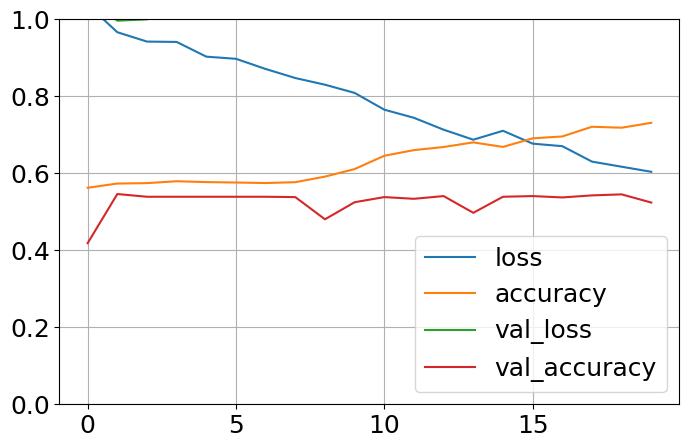

In [222]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [224]:
MRI_model.evaluate(Xds_test, y_testd)

36/36 [==============================] - 0s 5ms/step - loss: 1.3868 - accuracy: 0.5239


[1.386783242225647, 0.5239361524581909]

That didn't help. Let's play with the activation functions.

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_49 (Flatten)        (None, 4576)              0         
                                                                 
 dense_115 (Dense)           (None, 300)               1372800   
                                                                 
 dense_116 (Dense)           (None, 300)               90000     
                                                                 
 dense_117 (Dense)           (None, 300)               90000     
                                                                 
 dense_118 (Dense)           (None, 4)                 1204      
                                                                 
Total params: 1,554,004
Trainable params: 1,554,004
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [=======================

(0.0, 1.0)

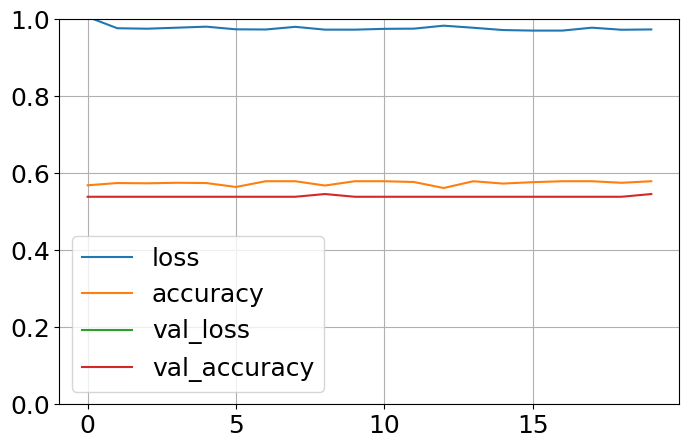

In [225]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(300, activation = 'tanh', use_bias = False))
MRI_model.add(keras.layers.Dense(300, activation = 'tanh', use_bias = False))
MRI_model.add(keras.layers.Dense(300, activation = 'tanh', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_50 (Flatten)        (None, 4576)              0         
                                                                 
 dense_119 (Dense)           (None, 300)               1372800   
                                                                 
 dense_120 (Dense)           (None, 300)               90000     
                                                                 
 dense_121 (Dense)           (None, 300)               90000     
                                                                 
 dense_122 (Dense)           (None, 4)                 1204      
                                                                 
Total params: 1,554,004
Trainable params: 1,554,004
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [=======================

(0.0, 1.0)

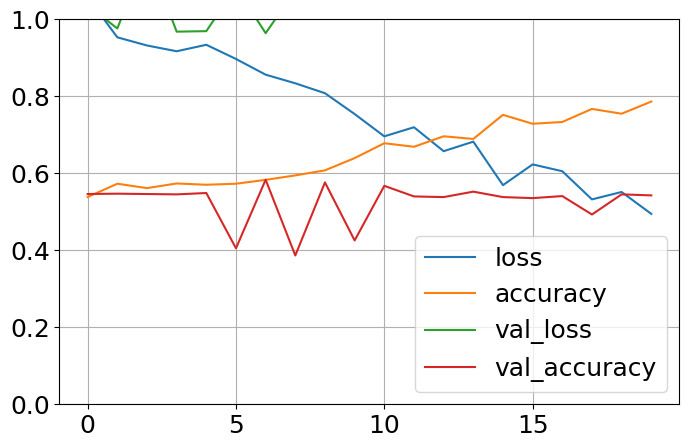

In [226]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'softmax'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [227]:
MRI_model.evaluate(Xds_test, y_testd)

36/36 [==============================] - 0s 4ms/step - loss: 1.5160 - accuracy: 0.5426


[1.5159716606140137, 0.542553186416626]

This is proving to be pretty tricky. Those validation losses just won't come down. Let's try dropout layers again

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_51 (Flatten)        (None, 4576)              0         
                                                                 
 dense_123 (Dense)           (None, 300)               1372800   
                                                                 
 dropout_15 (Dropout)        (None, 300)               0         
                                                                 
 dense_124 (Dense)           (None, 300)               90000     
                                                                 
 dropout_16 (Dropout)        (None, 300)               0         
                                                                 
 dense_125 (Dense)           (None, 300)               90000     
                                                                 
 dense_126 (Dense)           (None, 4)               

(0.0, 1.0)

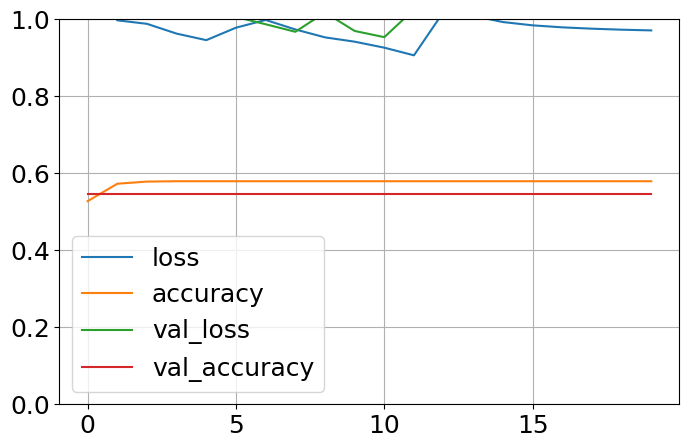

In [228]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dropout(0.3))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dropout(0.3))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'softmax'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [235]:
#lets try normalizing the data

X_tr = (Xds_train - Xds_train.mean())/Xds_train.std()
X_te = (Xds_test - Xds_test.mean())/Xds_test.std()

In [236]:
MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dropout(0.3))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dropout(0.3))
MRI_model.add(keras.layers.Dense(300, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'softmax'))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(X_tr, y_traind, epochs=20,
                    validation_data=(X_te, y_testd))

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_54 (Flatten)        (None, 4576)              0         
                                                                 
 dense_135 (Dense)           (None, 300)               1372800   
                                                                 
 dropout_21 (Dropout)        (None, 300)               0         
                                                                 
 dense_136 (Dense)           (None, 300)               90000     
                                                                 
 dropout_22 (Dropout)        (None, 300)               0         
                                                                 
 dense_137 (Dense)           (None, 300)               90000     
                                                                 
 dense_138 (Dense)           (None, 4)               

In [237]:
MRI_model.evaluate(X_te, y_testd)

36/36 [==============================] - 0s 4ms/step - loss: 4.4072 - accuracy: 0.5142


[4.407220840454102, 0.5141844153404236]

That made the problem even worse. Let's just start over.

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_55 (Flatten)        (None, 4576)              0         
                                                                 
 dense_139 (Dense)           (None, 30)                137280    
                                                                 
 dense_140 (Dense)           (None, 4)                 120       
                                                                 
Total params: 137,400
Trainable params: 137,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 1s 5ms/step - loss: 1.0212 - accuracy: 0.5521 - val_loss: 0.9899 - val_accuracy: 0.5426
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 0.9533 - accuracy: 0.5555 - val_loss: 1.0546 - val_accuracy: 0.5470
Epoch 3/20
141/141 [=======

(0.0, 1.0)

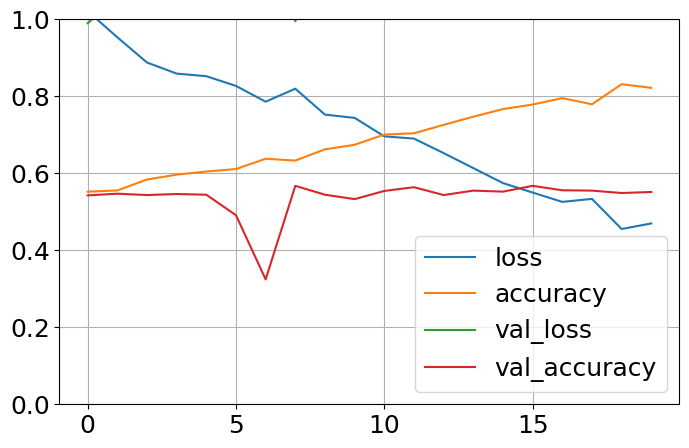

In [242]:
#reduce the number of nodes

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(30, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid', use_bias = False))

MRI_model.summary()

MRI_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [243]:
MRI_model.evaluate(Xds_test, y_testd)

36/36 [==============================] - 0s 2ms/step - loss: 1.1504 - accuracy: 0.5514


[1.1503653526306152, 0.5514184236526489]

Still overfitting

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_56 (Flatten)        (None, 4576)              0         
                                                                 
 dense_141 (Dense)           (None, 30)                137280    
                                                                 
 dense_142 (Dense)           (None, 4)                 120       
                                                                 
Total params: 137,400
Trainable params: 137,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1978 - accuracy: 0.5793 - val_loss: 0.1889 - val_accuracy: 0.5461
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1882 - accuracy: 0.5789 - val_loss: 0.2287 - val_accuracy: 0.5461
Epoch 3/20
141/141 [=======

(0.0, 1.0)

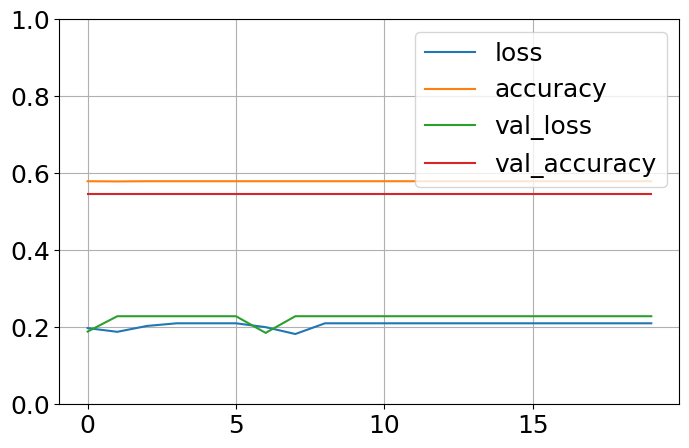

In [244]:
#change the loss function

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(30, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid', use_bias = False))

MRI_model.summary()

MRI_model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_57 (Flatten)        (None, 4576)              0         
                                                                 
 dense_143 (Dense)           (None, 30)                137280    
                                                                 
 dense_144 (Dense)           (None, 4)                 120       
                                                                 
Total params: 137,400
Trainable params: 137,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1523 - accuracy: 0.5639 - val_loss: 0.1522 - val_accuracy: 0.5470
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 0.5793 - val_loss: 0.1485 - val_accuracy: 0.5461
Epoch 3/20
141/141 [=======

(0.0, 1.0)

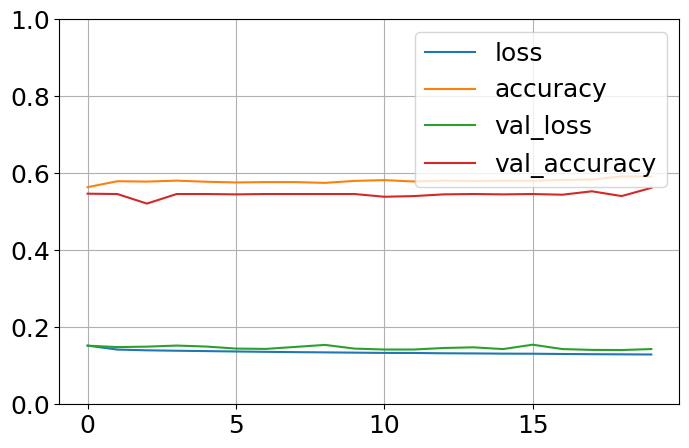

In [245]:
#change the optimizer

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(30, activation = 'relu', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid', use_bias = False))

MRI_model.summary()

MRI_model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [248]:
MRI_model.evaluate(Xds_test, y_testd)

36/36 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.5621


[0.14339546859264374, 0.5620567202568054]

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_58 (Flatten)        (None, 4576)              0         
                                                                 
 dense_145 (Dense)           (None, 30)                137280    
                                                                 
 dense_146 (Dense)           (None, 4)                 120       
                                                                 
Total params: 137,400
Trainable params: 137,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1653 - accuracy: 0.5593 - val_loss: 0.1584 - val_accuracy: 0.5390
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1482 - accuracy: 0.5793 - val_loss: 0.1540 - val_accuracy: 0.5390
Epoch 3/20
141/141 [=======

(0.0, 1.0)

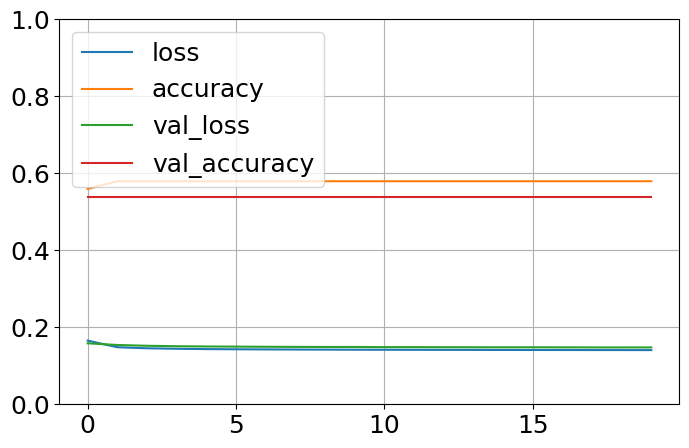

In [249]:
#change activation function in the hidden layer

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(30, activation = 'sigmoid', use_bias = False))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid', use_bias = False))

MRI_model.summary()

MRI_model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_59 (Flatten)        (None, 4576)              0         
                                                                 
 dense_147 (Dense)           (None, 30)                137310    
                                                                 
 dense_148 (Dense)           (None, 4)                 124       
                                                                 
Total params: 137,434
Trainable params: 137,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 1s 5ms/step - loss: 0.1466 - accuracy: 0.5755 - val_loss: 0.1492 - val_accuracy: 0.5461
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1415 - accuracy: 0.5793 - val_loss: 0.1471 - val_accuracy: 0.5461
Epoch 3/20
141/141 [=======

(0.0, 1.0)

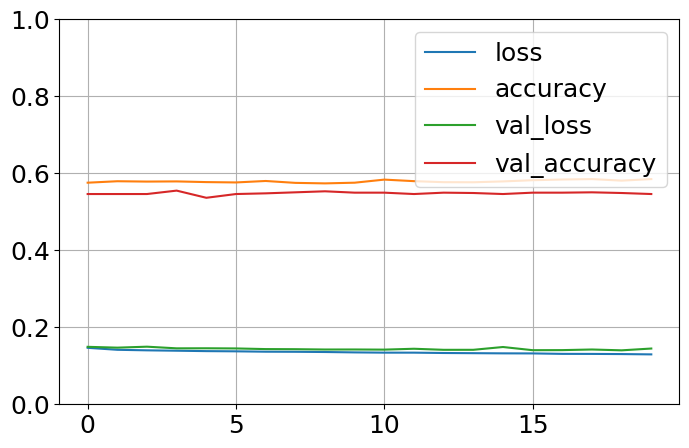

In [250]:
#use the biases

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(30, activation = 'relu'))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

MRI_model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_60 (Flatten)        (None, 4576)              0         
                                                                 
 dense_149 (Dense)           (None, 30)                137310    
                                                                 
 dense_150 (Dense)           (None, 30)                930       
                                                                 
 dense_151 (Dense)           (None, 4)                 124       
                                                                 
Total params: 138,364
Trainable params: 138,364
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1599 - accuracy: 0.5176 - val_loss: 0.1486 - val_accuracy: 0.5461
Epoch 2/20
141/141 [=================

(0.0, 1.0)

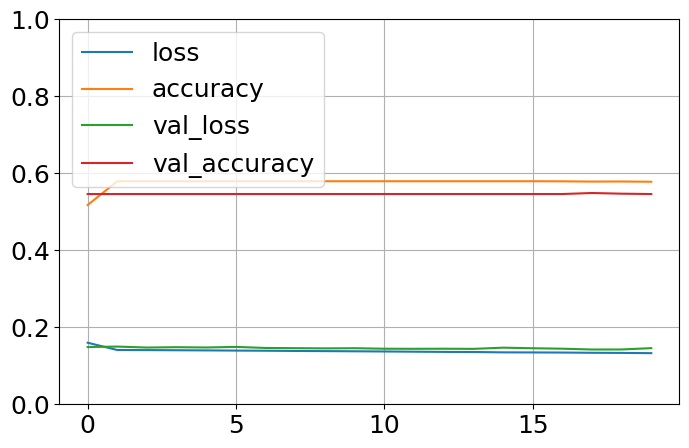

In [251]:
#add another layer

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Flatten(input_dim = 4576))
MRI_model.add(keras.layers.Dense(30, activation = 'relu'))
MRI_model.add(keras.layers.Dense(30, activation = 'relu'))
MRI_model.add(keras.layers.Dense(4, activation = 'sigmoid'))

MRI_model.summary()

MRI_model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_158 (Dense)           (None, 30)                137310    
                                                                 
 dense_159 (Dense)           (None, 4)                 124       
                                                                 
Total params: 137,434
Trainable params: 137,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1445 - accuracy: 0.5624 - val_loss: 0.1631 - val_accuracy: 0.5461
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 0.1410 - accuracy: 0.5733 - val_loss: 0.1458 - val_accuracy: 0.5408
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.5764 - val_loss: 0.1511 - val_accuracy: 0.5000
Epoch 4/20
141/14

(0.0, 1.0)

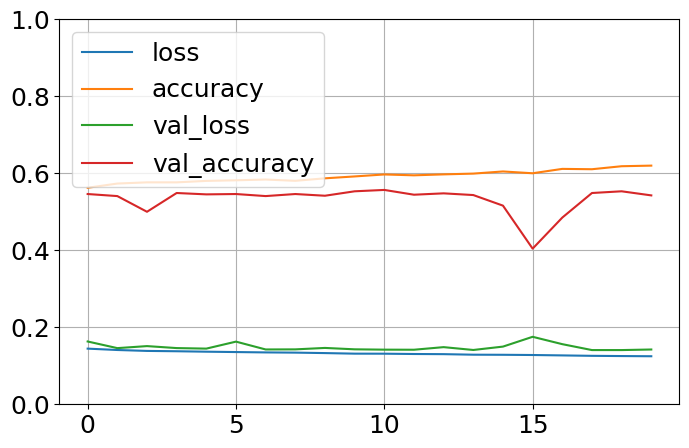

In [256]:
#remove the flat layer
#change output activation to softmax

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Dense(30, input_dim=4576, activation = 'relu'))
MRI_model.add(keras.layers.Dense(4, activation = 'softmax'))

MRI_model.summary()

MRI_model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

Let's continue that approach with more epochs

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 30)                137310    
                                                                 
 dense_161 (Dense)           (None, 4)                 124       
                                                                 
Total params: 137,434
Trainable params: 137,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
141/141 [==============================] - 1s 4ms/step - loss: 0.1464 - accuracy: 0.5622 - val_loss: 0.1540 - val_accuracy: 0.5461
Epoch 2/40
141/141 [==============================] - 0s 3ms/step - loss: 0.1407 - accuracy: 0.5795 - val_loss: 0.1466 - val_accuracy: 0.5470
Epoch 3/40
141/141 [==============================] - 1s 4ms/step - loss: 0.1390 - accuracy: 0.5787 - val_loss: 0.1474 - val_accuracy: 0.5461
Epoch 4/40
141/14

(0.0, 1.0)

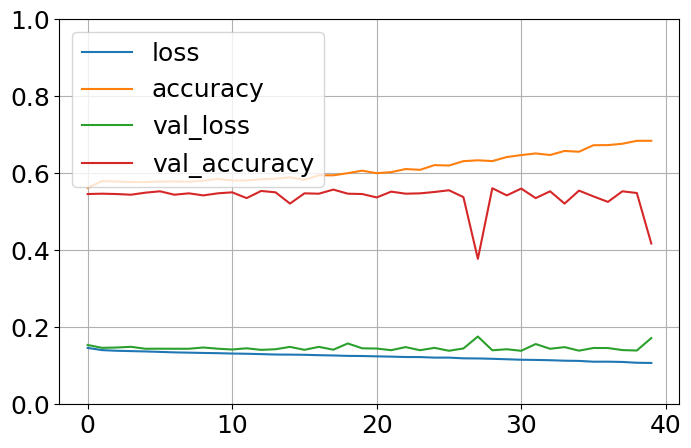

In [257]:
#more epochs

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Dense(30, input_dim=4576, activation = 'relu'))
MRI_model.add(keras.layers.Dense(4, activation = 'softmax'))

MRI_model.summary()

MRI_model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=40,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [258]:
MRI_model.evaluate(Xds_test, y_testd)

36/36 [==============================] - 0s 1ms/step - loss: 0.1720 - accuracy: 0.4176


[0.17200890183448792, 0.417553186416626]

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 30)                137310    
                                                                 
 dense_163 (Dense)           (None, 4)                 124       
                                                                 
Total params: 137,434
Trainable params: 137,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 2s 9ms/step - loss: 0.2492 - accuracy: 0.2736 - val_loss: 0.2487 - val_accuracy: 0.3103
Epoch 2/20
141/141 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.1796 - val_loss: 0.2482 - val_accuracy: 0.2571
Epoch 3/20
141/141 [==============================] - 1s 5ms/step - loss: 0.2475 - accuracy: 0.1809 - val_loss: 0.2496 - val_accuracy: 0.1232
Epoch 4/20
141/14

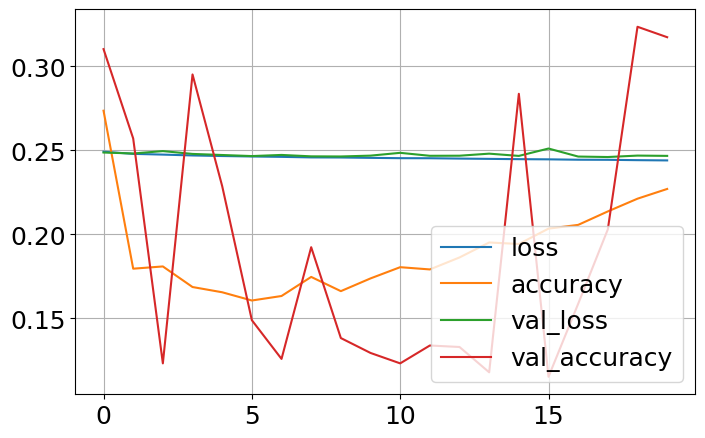

In [259]:
#let's try treating the target variable as a numeric and change the output activation function appropriately

MRI_model = keras.models.Sequential()
MRI_model.add(keras.layers.Dense(30, input_dim=4576, activation = 'relu'))
MRI_model.add(keras.layers.Dense(4, activation = 'relu'))

MRI_model.summary()

MRI_model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["accuracy"])

history = MRI_model.fit(Xds_train, y_traind, epochs=20,
                    validation_data=(Xds_test, y_testd))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

Thus, treating the target variable as a numeric yields disastrous results, further advancing the conclusion drawn in Lab 3 that the target should be treated as a categorical.

This problem is proving quite tricky. Any attempts made at improving training accuracy essentially amount to overfitting, resulting in training accuracy that diverges from validation accuracy. 

I would like to return to this problem in the future but for now I want to move on to another project.